In [12]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Thông tin dữ liệu ban đầu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

Kiểm tra giá trị thiếu:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
Kiem tra giá trị trùng lặp:
1
Thông tin dữ liệu sau khi tien xu ly:
<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal wid

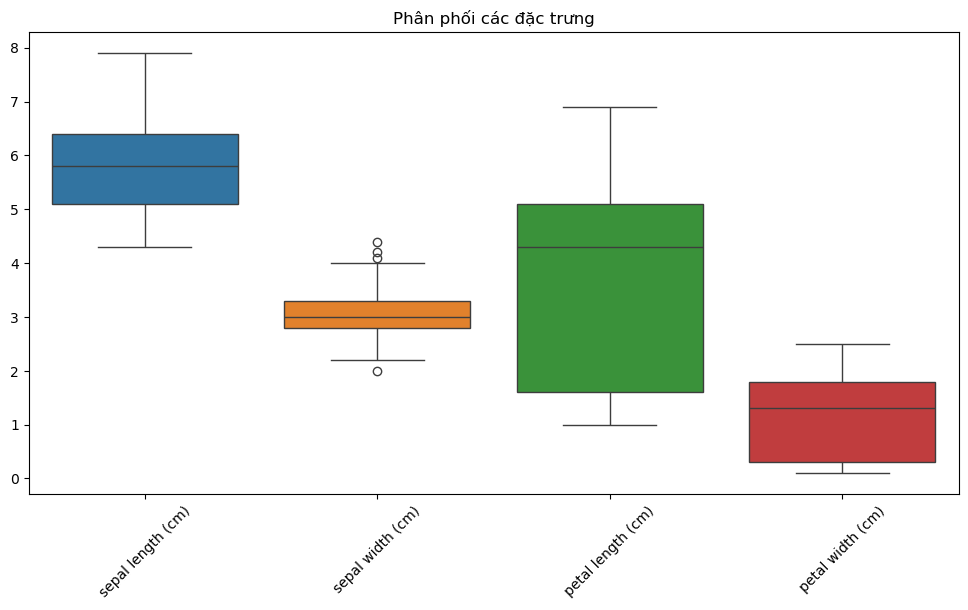

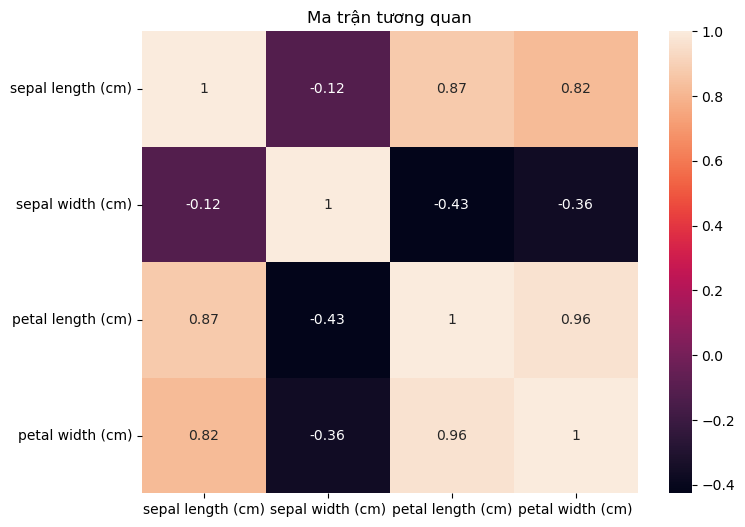

In [13]:
# Load dataset
data = load_iris()

X = pd.DataFrame(data.data, columns=load_iris().feature_names)
y = pd.Series(data.target)

X["species"] = y

# Tiền xử lý dữ liệu
print("Thông tin dữ liệu ban đầu:")
print(X.info())

print("\nKiểm tra giá trị thiếu:")
print(X.isnull().sum())

print("Kiem tra giá trị trùng lặp:")
print(X.duplicated().sum())

# Xoa du lieu trung lap
X = X.drop_duplicates()

# Thong tin du lieu sau khi tien xu ly
print("Thông tin dữ liệu sau khi tien xu ly:")
print(X.info())

#Cap nhat lai X va y sau khi xoa du lieu trung lap
y = X["species"]
X = X.drop(columns="species")

# Xử lý outliers bằng IQR
def remove_outliers(X):
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1
    return X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]

X_clean = remove_outliers(X)
y_clean = y[X_clean.index]

# Vẽ phân phối dữ liệu
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.title('Phân phối các đặc trưng')
plt.xticks(rotation=45)
plt.show()

# Kiểm tra tương quan
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True)
plt.title('Ma trận tương quan')
plt.show()

In [14]:
# Chia du lieu thanh tap train va test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train set size: {X_train.shape}, Test set size: {X_test.shape}")    

from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train set size: (119, 4), Test set size: (30, 4)


In [15]:
from sklearn.model_selection import GridSearchCV

# Định nghĩa không gian tham số rộng hơn
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Tìm kiếm lưới với cross-validation
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring=['accuracy', 'f1_macro'],
    refit='f1_macro',
    n_jobs=-1,
    verbose=2
)

# Huấn luyện
grid_search.fit(X_train_scaled, y_train)

# In kết quả
print(f"Tham số tốt nhất: {grid_search.best_params_}")
print(f"Độ chính xác tốt nhất: {grid_search.best_score_:.4f}")

# Huan luyen mo hinh Random Forest
model = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=2)
print("Training the Random Forest model...")

model.fit(X_train, y_train)
print("Model training completed.")

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


Traceback (most recent call last):
  File "/opt/miniconda3/envs/machine_learning/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/m9/l1nj0nwj3d51rmrcjmj4v_400000gn/T/joblib_memmapping_folder_1353_d3ee602f7caa45a5a64c848d0a2ac0ae_486efe685e1c4c019a3f43e86ed4d608 for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/opt/miniconda3/envs/machine_learning/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /loky-1353-h0c9uf34 for automatic cleanup: unknown resource type semlock
Traceback (most recent call last):
  File "/opt/miniconda3/envs/machine_learning/lib/python3.13/multiprocessing/resource_track

[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min


Báo cáo phân loại chi tiết:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



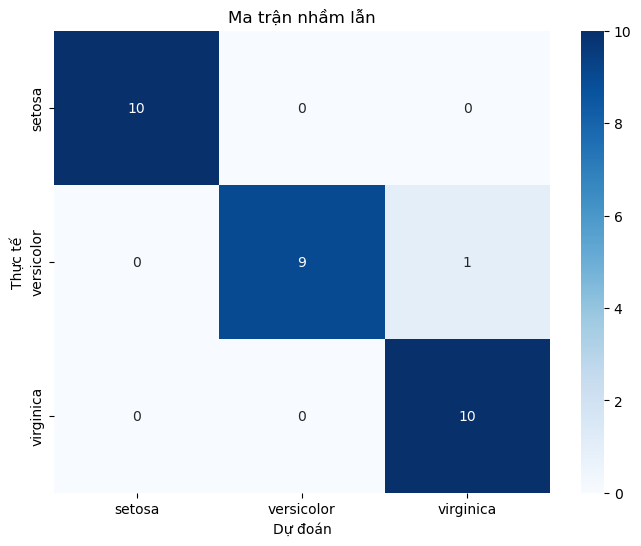

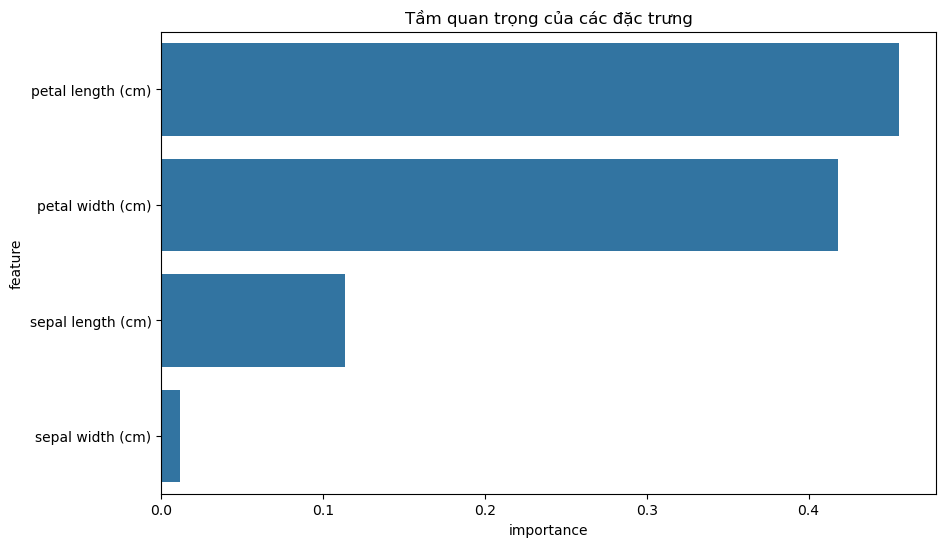

In [16]:
# Sử dụng mô hình tốt nhất
best_model = grid_search.best_estimator_

# Đánh giá trên tập test
y_pred = best_model.predict(X_test_scaled)

# In báo cáo chi tiết
print("\nBáo cáo phân loại chi tiết:")
print(classification_report(y_test, y_pred))

# Vẽ ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=load_iris().target_names,
            yticklabels=load_iris().target_names)
plt.title('Ma trận nhầm lẫn')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.show()

# Vẽ tầm quan trọng của đặc trưng
feature_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_imp, x='importance', y='feature')
plt.title('Tầm quan trọng của các đặc trưng')
plt.show()

Traceback (most recent call last):
  File "/opt/miniconda3/envs/machine_learning/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/m9/l1nj0nwj3d51rmrcjmj4v_400000gn/T/joblib_memmapping_folder_1353_d4a494697ef140809f41102038e6670f_a4b655d94ca34e8d84b0bf137b77cf00 for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/opt/miniconda3/envs/machine_learning/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/m9/l1nj0nwj3d51rmrcjmj4v_400000gn/T/joblib_memmapping_folder_1353_d3ee602f7caa45a5a64c848d0a2ac0ae_5b99758dd2434999ad0c937f6270ac43 for automatic cleanup: unknown resource type folder


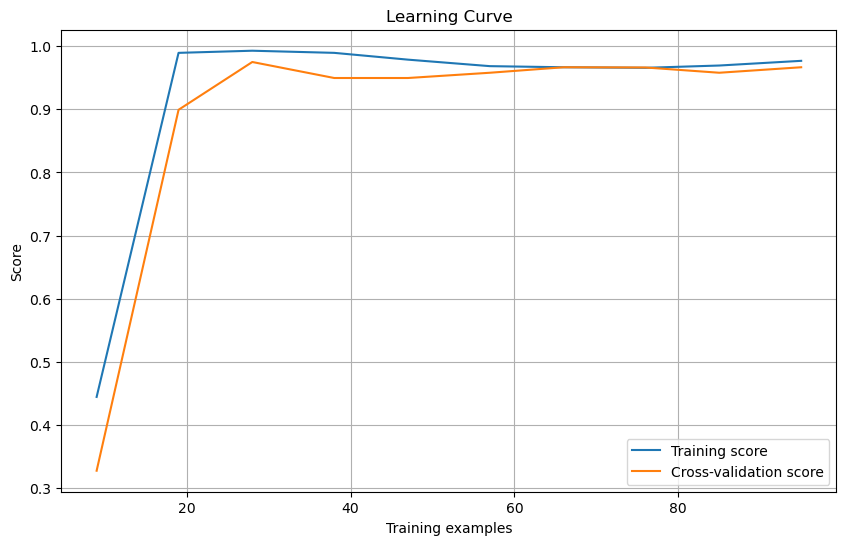


Dự đoán cho dữ liệu mới:
Mẫu 1: setosa
Mẫu 2: versicolor
Mẫu 3: virginica
Độ tin cậy mẫu 1: 99.82%
Độ tin cậy mẫu 2: 83.68%
Độ tin cậy mẫu 3: 93.82%


/opt/miniconda3/envs/machine_learning/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/machine_learning/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [17]:
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Vẽ đường cong học tập cho mô hình tốt nhất
plot_learning_curve(best_model, X_train_scaled, y_train)

# Du doan
new_data =  [[5.1, 3.5, 1.4, 0.2], 
             [6.7, 3.1, 4.7, 1.5], 
             [7.2, 3.6, 6.1, 2.5]]

predictions = model.predict(new_data)
iris = load_iris()  # Lấy dataset để có target_names

print("\nDự đoán cho dữ liệu mới:")
for i, pred in enumerate(predictions):
    print(f"Mẫu {i+1}: {iris.target_names[pred]}")

# Thêm độ tin cậy của dự đoán
probabilities = model.predict_proba(new_data)
for i, proba in enumerate(probabilities):
    confidence = max(proba) * 100
    print(f"Độ tin cậy mẫu {i+1}: {confidence:.2f}%")